In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval
import re

In [3]:
merge = pd.concat(map(pd.read_csv, ["../Raw_CSV/April 25-26 - 2022/Indeed/Indeed-artist.csv","../Raw_CSV/April 27 - 2022/Indeed/Indeed-artist.csv", "../Raw_CSV/April 28 - 2022/Indeed/Indeed-artist.csv","../Raw_CSV/April 21-22 - 2022/Indeed/artist.csv"]),ignore_index=True)

In [4]:
#Describing the data
merge.describe()

,Title,Company,SalaryOne,SalaryTwo,Location,Summary,Qualification,Role&Responsibilities
count,390,390,315,315,390,390,315,315
unique,104,158,36,50,48,170,163,162
top,Graphic Artist,Canva,None,None,Makati,Candidate must possess at least Highschool Dip...,[],[]
freq,63,11,258,199,54,8,10,10


In [5]:
#View Data's
merge

,Title,Company,SalaryOne,SalaryTwo,Location,Summary,Qualification,Role&Responsibilities
0,Graphic Artist,The Aristocrat Restaurant,"PHP 23,000 - PHP 27,000 a month",None,Malate,Design and format layout of presentation mater...,"['8 hour shift', '13th month salary', 'Overtim...",['Design and format layout of presentation mat...
1,newGraphic Artist - Supervisor Level,Super Shopping Market Inc. (SM Hypermarket) - ...,None,None,Pasay,"Must be a graduate of Graphic design, Advertis...","['Must be a graduate of Graphic design, Advert...","['For Applicants, please send your updated Res..."
2,newE - Learning Graphic Artist,Hunter's Hub Inc.,"PHP 42,000 a month",None,Makati,1-3 years as a graphic/digital creative artist...,['More than 1 year of experience designing & i...,"['Qualifications: ', 'Job Description: ', 'The..."
3,Sculpture Artist,LIVEWERKZ PTE. LTD.,"PHP 15,000 - PHP 40,000 a month",None,Quezon City,Construct 3D art works using materials such as...,['Construct 3D art works using materials such ...,"['Job Description and Requirements', 'Benefits..."
4,Graphic Artist Work from Home,Relotz,None,None,Remote in Manila+3 locations,1-2 years of experience as a graphic artist.,"['Work from home', '8 hour shift', 'Bonus pay'...",['Are you an opportunity-seeker? Because we ar...
...,...,...,...,...,...,...,...,...
385,newGraphic Artist,One Outsource Direct Corp.,NaN,NaN,Makati,The Graphic Artist (GA)is responsible for over...,NaN,NaN
386,Graphic Artist,Reckitt,NaN,NaN,Makati,Competitive Salary & excellent benefits package.,NaN,NaN
387,newGraphic Artist,Majestic Graphic & Printing Corporation,NaN,NaN,Makati,"Advanced skills in Adobe Photoshop, Illustrato...",NaN,NaN
388,Graphic Artist,SkinStation,NaN,NaN,Fort Bonifacio,Meet with the creative director to determine t...,NaN,NaN


In [6]:
location = merge["Location"].value_counts()[0:10] # Location
salary = merge["SalaryOne"] + " " + merge["SalaryTwo"] # Salary
title = merge["Title"].value_counts()[0:10]

In [7]:
location.to_frame()

,Location
Makati,54
Remote in Manila,44
Manila,31
Remote,30
Quezon City,28
Pasig,23
Taguig,22
Pasay,22
Remote in Pasig,12
Mandaluyong,10


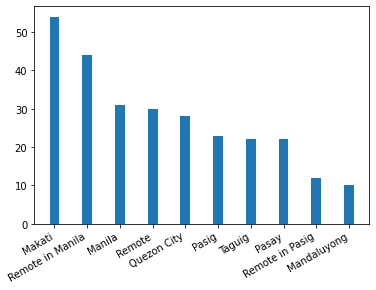

In [19]:
plt.bar(location.index, location.values,width=0.3)
plt.xticks(rotation=30,ha="right")
plt.show()

In [9]:
title.to_frame()

,Title
Graphic Artist,63
newGraphic Artist,60
newGraphic Artist/Designer,15
Multimedia Artist,10
newGRAPHIC ARTIST,8
Production Graphic Artist,8
GRAPHIC ARTIST,8
Graphic Artist/Designer,8
Graphic Artist (Entry-Level),7
Junior Graphic Artist,7


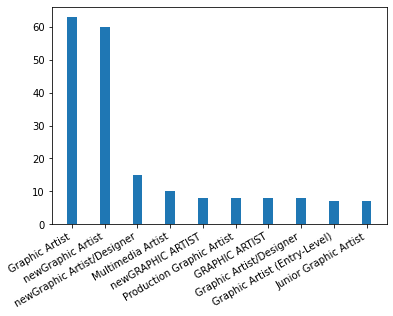

In [16]:
plt.bar(title.index, title.values,width=0.3,)
plt.xticks(rotation=30,ha="right")
plt.show()

In [11]:
company = merge["Company"].value_counts()[0:10]

In [18]:
company.to_frame()

,Company
Canva,11
SVEN Group,10
sgsco,8
ConnectUs Marketing Solutions Inc.,8
AIRCLASS (PHILIPPINES) CORP.,7
RetainLab,7
Bria,7
Avvanz Pte Ltd,7
ActivAsia Inc.,7
Philippine Women's University,6


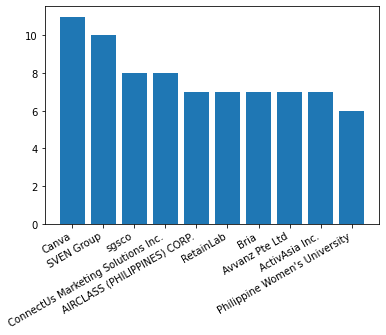

In [17]:
plt.bar(company.index, company.values)
plt.xticks(rotation=30,ha="right")
plt.show()

In [13]:
replace = merge["Qualification"].str.replace("^\['|'\]$","")

/var/folders/tc/qdg72rpx523gjsqcr2vf_0c00000gn/T/ipykernel_3335/1200321832.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  replace = merge["Qualification"].str.replace("^\['|'\]$","")


In [ ]:
for i in range(len(merge["Qualification"])):
    a_list = literal_eval(merge["Qualification"][i])
    for j in range(len(a_list)):
        print(a_list[j])